In [58]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import numpy as np

In [59]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [60]:
def get_neighbors(train_set, labels, test_row, num_neighbors):
    neighbors = []

    for i, vec in enumerate(train_set):
        neighbor = (vec, euclidean_distance(vec, test_row), labels[i])
        neighbors.append(neighbor)

    sorted_list = sorted(neighbors, key=lambda x: x[1])
    return sorted_list[:num_neighbors]

In [61]:
def predict_classification(train_set, labels, test_row, num_neighbors):
    neighbors = get_neighbors(train_set, labels, test_row, num_neighbors)
    labels_counter = {}

    for n in neighbors:
        if not n[2] in labels_counter:
            labels_counter[n[2]] = 1
            continue
        labels_counter[n[2]] += 1
        
    max_key_label = max(labels_counter, key=labels_counter.get)
    return max_key_label

In [62]:
def k_nearest_neighbors(train_set, labels, test, num_neighbors):
    predictions = []


    for test_vec in test:
            
        prediction = predict_classification(train_set, labels, test_vec, num_neighbors)
                
        predictions.append(prediction)


    return predictions

In [63]:
iris = load_iris()

In [64]:
X = iris['data']
y = iris['target']

In [65]:
dataset = X[:150:15]
output = y[:150:15]

In [66]:
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [67]:
for d in dataset:
    print(euclidean_distance(d, dataset[5]))


3.59722114972099
3.4899856733230297
3.539774004085572
3.66742416417845
2.128379665379276
0.0
1.1874342087037915
2.5159491250818244
1.6217274740226855
2.2158519806160335


In [68]:
neighbors = get_neighbors(dataset, output, dataset[5], 3)
neighbors

[(array([6.6, 3. , 4.4, 1.4]), 0.0, 1),
 (array([5.5, 2.6, 4.4, 1.2]), 1.1874342087037915, 1),
 (array([6.9, 3.2, 5.7, 2.3]), 1.6217274740226855, 2)]

In [69]:
max_key_label = predict_classification(dataset, output, dataset[5], 3)
print("Expected %d, Got %d."% (output[5], max_key_label))

Expected 1, Got 1.


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
num_neighbors = 3

test_set = X_train 
predictions = k_nearest_neighbors(X_train, y_train, X_test, num_neighbors)
predictions

[1,
 2,
 1,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 0,
 2,
 2,
 1,
 0,
 2,
 1,
 2]

In [71]:
print("Precision:" + str(len(np.where(y_test == predictions)[0]) / len(y_test)))

Precision:0.9666666666666667


In [72]:
y_test[-1] == predictions[-1]

True

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
num_neighbors = 1

test_set = X_train  # Мы можем использовать тот же набор для теста
predictions = k_nearest_neighbors(X_train, y_train, X_test, num_neighbors)
predictions

[0,
 2,
 1,
 2,
 1,
 1,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 0,
 0,
 2,
 2,
 1,
 2,
 1]

In [74]:
print("Precision:" + str(len(np.where(y_test == predictions)[0]) / len(y_test)))

Precision:1.0


In [75]:
y_test[-1] == predictions[-1]

True

In [76]:
y_plot = []
k_max = 61

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


for k in range(1, k_max):
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    predictions = k_nearest_neighbors(X_train, y_train, X_test, k)
    accuracy = len(np.where(y_test == predictions)[0]) / len(y_test)

    y_plot.append(accuracy)

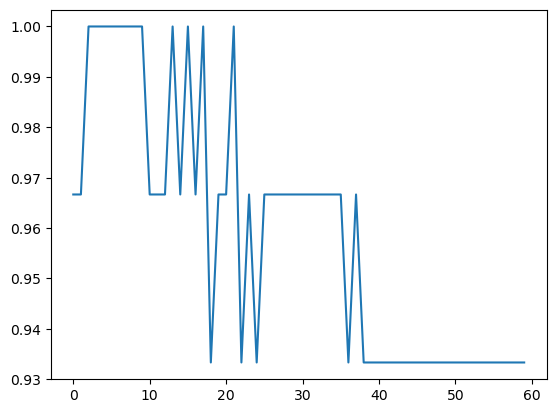

In [77]:
plt.plot(y_plot)

In [78]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=num_neighbors)
neigh.fit(X_train, y_train)
pred = neigh.predict(X_test)
print(y_test == pred)

[ True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


In [79]:
print('Precision:', len(np.where(y_test == pred)[0]) / len(y_test))

Precision: 0.9666666666666667


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:2, :])

In [81]:
clf.predict_proba(X[:2, :])

array([[9.81815537e-01, 1.81844486e-02, 1.44032759e-08],
       [9.71757371e-01, 2.82425992e-02, 3.01211473e-08]])

In [82]:
clf.score(X, y)

0.9733333333333334

# TASK 2

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, 
    iris.target,
    stratify=iris.target, 
    random_state=42
)

In [84]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.921


In [85]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе: 0.991
Правильность на тестовом наборе: 0.921


In [86]:
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе: 0.964
Правильность на тестовом наборе: 0.921


In [87]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе: 0.964
Правильность на тестовом наборе: 0.895


In [88]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе: 0.991
Правильность на тестовом наборе: 0.921


In [106]:
tree = DecisionTreeClassifier(max_depth=1, random_state=0)
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе: 0.670
Правильность на тестовом наборе: 0.658


In [90]:
##############################################################################################

In [91]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(forest.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(forest.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.947


In [92]:
forest = RandomForestClassifier(n_estimators=10, random_state=2)
forest.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(forest.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(forest.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.895


In [93]:
forest = RandomForestClassifier(n_estimators=2, random_state=2)
forest.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(forest.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(forest.score(X_test, y_test)))

Правильность на обучающем наборе: 0.991
Правильность на тестовом наборе: 0.895


In [94]:
forest = RandomForestClassifier(n_estimators=3, random_state=2)
forest.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(forest.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(forest.score(X_test, y_test)))

Правильность на обучающем наборе: 0.982
Правильность на тестовом наборе: 0.947


In [95]:
forest = RandomForestClassifier(n_estimators=1, random_state=2)
forest.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(forest.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(forest.score(X_test, y_test)))

Правильность на обучающем наборе: 0.973
Правильность на тестовом наборе: 0.947


In [96]:
##############################################################################################

In [97]:
gbrt = GradientBoostingClassifier(random_state=28)
gbrt.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.974


In [98]:
gbrt = GradientBoostingClassifier(
    random_state=28,
    max_depth=10
    
)
gbrt.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.921


In [99]:
gbrt = GradientBoostingClassifier(
    random_state=28,
    max_depth=2
    
)
gbrt.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.947


In [100]:
gbrt = GradientBoostingClassifier(
    random_state=28,
    max_depth=1
    
)
gbrt.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.895


In [101]:
gbrt = GradientBoostingClassifier(
    random_state=28,
    learning_rate=0.01
    
)
gbrt.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 0.991
Правильность на тестовом наборе: 0.921


In [102]:
gbrt = GradientBoostingClassifier(
    random_state=28,
    learning_rate=0.01,
    max_depth=2    
)
gbrt.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 0.982
Правильность на тестовом наборе: 0.974


In [103]:
gbrt = GradientBoostingClassifier(
    random_state=28,
    learning_rate=0.01,
    max_depth=4
)
gbrt.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.974


In [104]:
gbrt = GradientBoostingClassifier(
    random_state=28,
    learning_rate=0.01,
    max_depth=1
)
gbrt.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 0.982
Правильность на тестовом наборе: 0.921
